# Dressed Energy Levels at the QuaDiSQ point

This notebook calculates the dressed energy levels of the two-qubit transmon system for the parameters marked by "x" in Fig 1,2 in the paper.

In [1]:
import QDYN
import qutip
import numpy as np
from qnet.algebra import LocalSpace

In [2]:
from model_v2 import transmon_model, state as bare_state

In [3]:
%load_ext autoreload

In [4]:
%autoreload 2

The bare parameters are as follows:

In [5]:
w1     = 6000.0 # MHz
w2     = 5900.0 # MHz
wc     = 6200.0 # MHz
wd     = 0 # 5932.5 # MHz
alpha1 = -290.0 # MHz
alpha2 = -310.0 # MHz
g      =   70.0 # MHz
n_qubit = 5
n_cavity = 6
kappa = 0.0
gamma = 0.0
alpha = 0.5 * abs(alpha1 + alpha2)

In [6]:
zero_pulse = QDYN.pulse.Pulse(QDYN.pulse.pulse_tgrid(50, 2000), time_unit='ns', ampl_unit='MHz')

In [7]:
model = transmon_model(
    n_qubit, n_cavity, w1, w2, wc, wd, alpha1, alpha2, g, gamma, kappa,
    lambda_a=1.0, pulse=zero_pulse, dissipation_model='non-Hermitian')

We consider the drift Hamiltonian

In [8]:
H0 = model.ham()[0]

Due to the non-zero qubit-cavity coupling, the Hamiltonian is not diagonal:

In [9]:
def spy(m, ax):
    from scipy.sparse import coo_matrix
    from matplotlib.patches import Rectangle
    if not isinstance(m, coo_matrix):
        m = coo_matrix(m)
    for (x, y) in zip(m.col, m.row):
        ax.add_artist(Rectangle(
            xy=(x-0.5, y-0.5), width=1, height=1))
    ax.set_xlim(-0.5, m.shape[1]-0.5)
    ax.set_ylim(-0.5, m.shape[0]-0.5)
    ax.invert_yaxis()
    ax.set_aspect(float(m.shape[0])/float(m.shape[1]))

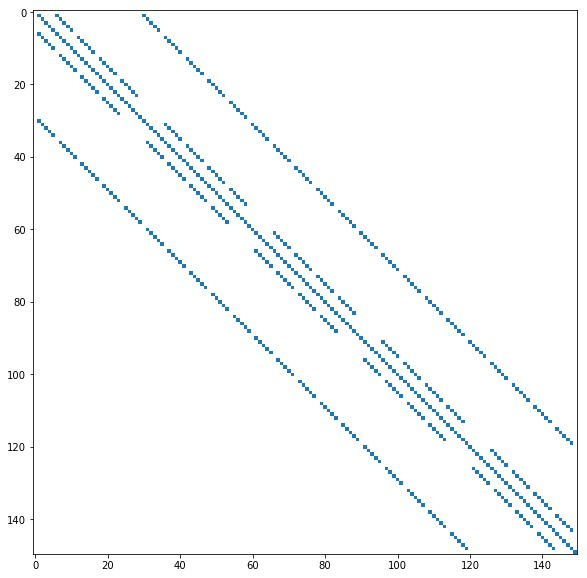

In [10]:
import matplotlib.pylab as plt
fig, ax = plt.subplots(figsize=(10, 10))
spy(H0.data, ax)
plt.show(fig)

By diagonalizing it, we obtain the "dressed" energy levels, i.e. the eigenvalues corresponding to those eigenstates that we choose as the logical basis

In [11]:
eigvals, eigvecs = H0.eigenstates()

In [12]:
hs = (LocalSpace('q1', dimension=n_qubit, order_index=1) *
      LocalSpace('q2', dimension=n_qubit, order_index=2) *
      LocalSpace('c', dimension=n_cavity, order_index=3))

In [13]:
hs

ℌ_q₁ ⊗ ℌ_q₂ ⊗ ℌ_c

In [14]:
def overlaps(state, eigvecs):
    return [abs(state.dag() * psi)[0,0] for psi in eigvecs]

## Dressed logical levels

The "dressed" logical basis (eigenstates with greatest overlap with the bare eigenstates) are stored in the model

In [15]:
psi00 = model._psi['00']
psi01 = model._psi['01']
psi10 = model._psi['10']
psi11 = model._psi['11']

In [16]:
ind000 = np.argmax(overlaps(psi00, eigvecs))
ind010 = np.argmax(overlaps(psi01, eigvecs))
ind100 = np.argmax(overlaps(psi10, eigvecs))
ind110 = np.argmax(overlaps(psi11, eigvecs))

In [17]:
eigvals[ind000]

0.0

In [18]:
eigvals[ind010]

5882.2547352850534

In [19]:
eigvals[ind100]

5982.323131204138

In [20]:
eigvals[ind110]

11864.869567486458

For each qubit, the state of the other qubit splits the transition energy:

In [21]:
w_1_dressed_0 = eigvals[ind100] - eigvals[ind000]
w_1_dressed_1 = eigvals[ind110] - eigvals[ind010]
w_2_dressed_0 = eigvals[ind010] - eigvals[ind000]
w_2_dressed_1 = eigvals[ind110] - eigvals[ind100]

In [22]:
w_1_dressed_0

5982.323131204138

In [23]:
w_1_dressed_1

5982.6148322014042

In [24]:
w_2_dressed_0

5882.2547352850534

In [25]:
w_2_dressed_1

5882.5464362823195

Since this splitting is extremely small, we simply take the average as the one "dressed" qubit frequency:

In [26]:
0.5 * (w_1_dressed_0 + w_1_dressed_1)

5982.4689817027711

In [27]:
0.5 * (w_2_dressed_0 + w_2_dressed_1)

5882.4005857836864

## Dressed cavity

In [28]:
ind001 = np.argmax(overlaps(bare_state(hs, 0, 0, 1), eigvecs))

In [29]:
wc_dressed = eigvals[ind001] - eigvals[ind000]

In [30]:
wc_dressed

6235.4221335108086